In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import metrics

sns.set_style("darkgrid")

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [3]:
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
HomeCredit_columns_description = pd.read_csv('HomeCredit_columns_description.csv') #, encoding= 'unicode_escape')
installments_payments = pd.read_csv('installments_payments.csv')
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
sample_submission = pd.read_csv('sample_submission.csv')

----------------------------------------------

## <center>1) Prise en main de la base de données</center>

### 1 - application_train

**application = demande (de prêt)**

In [4]:
application_train.shape

(307511, 122)

In [5]:
pd.set_option('display.max_columns', None)

application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
application_train.SK_ID_CURR.value_counts()

100401    1
239070    1
243164    1
230874    1
237017    1
         ..
154398    1
148253    1
150300    1
160539    1
100303    1
Name: SK_ID_CURR, Length: 307511, dtype: int64

**--> application_train contient un grand nombre d'indicateurs sur chaque prêt. 1 ligne = 1 prêt. Le tableau contient également une colonne "target" qui vaut 0 si le prêt a été remboursé, 1 sinon**

### 2 - application_test

In [7]:
application_test.shape

(48744, 121)

In [8]:
application_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

**--> application_test contient les même colonnes que application_train sauf la colonne "target". Ces deux tableaux sont créés pour être des split train/test lors de machine learning supervisé**

### 3 - bureau

In [9]:
bureau.shape

(1716428, 17)

In [10]:
bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [11]:
application_train[application_train['SK_ID_CURR']==215354]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
99355,215354,0,Cash loans,F,Y,N,0,270000.0,720000.0,21181.5,720000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.028663,-17520,-939,-1203.0,-1064,4.0,1,1,0,1,0,0,Accountants,2.0,2,2,MONDAY,13,0,0,0,0,0,0,Trade: type 7,0.873736,0.522745,0.231439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,-1553.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [12]:
bureau[bureau['SK_ID_CURR']==215354]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.8,42103.80,0.00,0.0,Consumer credit,-22,NaN
225157,215354,5714458,Closed,currency 1,-1872,0,-776.0,-1203.0,NaN,0,494550.0,0.00,0.00,0.0,Consumer credit,-696,NaN
225158,215354,5714459,Closed,currency 1,-1734,0,-638.0,-1336.0,NaN,0,1084032.0,0.00,NaN,0.0,Car loan,-1336,NaN
225159,215354,5714460,Closed,currency 1,-1333,0,-1089.0,-987.0,NaN,0,102150.0,NaN,NaN,0.0,Consumer credit,-984,NaN


**--> bureau liste les données de crédits précédents, contractés dans un autre organisme que Home Credit, associés aux clients qui ont un crédit chez Home Credit. 1 ligne correspond à un crédit précédent.**

### 4 - bureau_balance

In [13]:
bureau_balance.shape

(27299925, 3)

In [14]:
bureau_balance.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [15]:
bureau_balance[bureau_balance['SK_ID_BUREAU']==5715448]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


**--> bureau_balance semble présenter les paiements mensuels relatifs à chacun des crédit précédents (repertoriés dans "bureau"). 1 ligne correspond à 1 mois du crédit**

### 5 - credit_card_balance

In [16]:
credit_card_balance.shape

(3840312, 23)

In [17]:
credit_card_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [18]:
credit_card_balance[credit_card_balance['SK_ID_CURR']==215354].sort_values('MONTHS_BALANCE', ascending=False)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2866689,2340808,215354,-1,401144.985,450000,0.0,0.000,0.0,0.000,20061.315,20250.0,20250.000,380975.850,398211.480,398211.480,0.0,0,0.0,0.0,27.0,Active,0,0
910250,2340808,215354,-2,407511.405,450000,0.0,0.000,0.0,0.000,20459.565,0.0,0.000,386690.850,404533.890,404533.890,0.0,0,0.0,0.0,26.0,Active,0,0
415088,2340808,215354,-3,370571.985,450000,270000.0,270000.000,0.0,0.000,4366.935,22500.0,2040.435,364190.850,370571.985,370571.985,2.0,2,0.0,0.0,25.0,Active,0,0
2264373,2340808,215354,-4,130543.650,450000,45000.0,48150.000,0.0,3150.000,20981.430,4500.0,133.065,125778.285,129198.150,129198.150,1.0,2,0.0,1.0,24.0,Active,0,0
1030307,2340808,215354,-5,55493.280,450000,0.0,1368.000,0.0,1368.000,18839.970,342000.0,321018.570,50628.285,55493.280,55493.280,0.0,1,0.0,1.0,23.0,Active,0,0
2062452,2340808,215354,-6,409706.730,450000,45000.0,47250.000,0.0,2250.000,18948.375,37849.5,19009.530,402899.355,408361.230,408361.230,1.0,2,0.0,1.0,22.0,Active,0,0
489652,2340808,215354,-7,383473.665,450000,0.0,90000.000,0.0,90000.000,13186.170,13500.0,13500.000,367223.400,380646.045,380646.045,0.0,1,0.0,1.0,21.0,Active,0,0
2030170,2340808,215354,-8,294434.955,450000,27000.0,117000.000,0.0,90000.000,15947.640,155700.0,155700.000,280771.560,291135.420,291135.420,1.0,2,0.0,1.0,20.0,Active,0,0
2768609,2340808,215354,-9,324466.380,450000,0.0,519.120,0.0,519.120,16252.920,17775.0,17775.000,307802.790,322100.280,322100.280,0.0,1,0.0,1.0,19.0,Active,0,0
3555301,2340808,215354,-10,330098.625,450000,0.0,1350.000,0.0,1350.000,17010.450,30150.0,30150.000,313429.095,327685.230,327685.230,0.0,1,0.0,1.0,18.0,Active,0,0


**--> credit_card_balance semble décrire le comportement des clients de précédents prêts contractés chez Home Credit (pour des clients liés à des prêts en cours)**

### 6 - HomeCredit_columns_description

In [19]:
HomeCredit_columns_description.shape

(219, 5)

In [20]:
HomeCredit_columns_description.head(5)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


**--> HomeCredit_columns_description décrit toutes les colonnes de chaque fichier disponible**

### 7 - installments_payments

**installment = versement / mensualité**

In [21]:
installments_payments.shape

(13605401, 8)

In [22]:
installments_payments.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [23]:
pd.options.display.max_rows = 150

installments_payments[installments_payments['SK_ID_CURR']==215354].sort_values('DAYS_INSTALMENT', ascending=True)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
4327351,1362380,215354,1.0,1,-2548.0,-2552.0,5384.295,5384.295
5702561,1362380,215354,1.0,2,-2518.0,-2527.0,5384.295,5384.295
6402849,1362380,215354,1.0,3,-2488.0,-2498.0,5384.295,5384.295
5381276,1362380,215354,1.0,4,-2458.0,-2477.0,5384.295,5384.295
4331538,1362380,215354,1.0,5,-2428.0,-2477.0,5384.295,5384.295
7584543,1362380,215354,1.0,6,-2398.0,-2477.0,5384.295,5384.295
5401421,1362380,215354,1.0,7,-2368.0,-2371.0,5384.295,5384.295
4848591,1362380,215354,1.0,8,-2338.0,-2342.0,5352.300,5352.300
7290792,2829838,215354,1.0,1,-887.0,-898.0,51081.750,51081.750
4095294,2340808,215354,0.0,1,-884.0,-884.0,137025.000,137025.000


**--> installments_payments semble établir l'historique des paiements de précédents crédits Home Office. 1 ligne correspond à 1 paiement**

### 8 - POS_CASH_balance

In [24]:
POS_CASH_balance.shape

(10001358, 8)

In [25]:
POS_CASH_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [26]:
POS_CASH_balance[POS_CASH_balance['SK_ID_CURR']==215354].sort_values('MONTHS_BALANCE')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
4802353,1362380,215354,-84,8.0,8.0,Active,0,0
4355326,1362380,215354,-83,8.0,7.0,Active,0,0
8923143,1362380,215354,-82,8.0,6.0,Active,0,0
4374636,1362380,215354,-81,8.0,5.0,Active,0,0
3710204,1362380,215354,-80,8.0,4.0,Active,0,0
1687741,1362380,215354,-79,8.0,3.0,Active,0,0
6039050,1362380,215354,-78,8.0,2.0,Active,0,0
2087412,1362380,215354,-77,8.0,1.0,Active,0,0
3978019,1362380,215354,-76,8.0,0.0,Completed,0,0
4226722,2829838,215354,-30,48.0,48.0,Active,0,0


**--> POS_CASH_balance décrit le remboursement mensuel de prêts précédents chez Home Credit. 1 ligne représente 1 mois de remboursement**

### 9 - previous_application

In [27]:
previous_application.shape

(1670214, 37)

In [28]:
previous_application.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


**--> previous_application décrit les précédentes demandes de prêt. 1 ligne correspond à 1 demande de prêt**

### 10 - sample_submission

In [29]:
sample_submission.shape

(48744, 2)

In [30]:
sample_submission.head(5)

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [31]:
sample_submission.TARGET.value_counts()

0.5    48744
Name: TARGET, dtype: int64

In [32]:
sample_submission.SK_ID_CURR.value_counts()

131072    1
234556    1
312077    1
381711    1
366909    1
         ..
114077    1
175519    1
411012    1
410679    1
198655    1
Name: SK_ID_CURR, Length: 48744, dtype: int64

**--> sample_submission contient l'ensemble des identifiants de demandes de prêt contenues dans "application_test" ainsi qu'une valeur de 0.5 pour chaque cible**

----------------------

## <center>2) Sélection d'un modèle Kaggle</center>

**Nous choisissons le modèle Kaggle suivant :**

https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

------------------

## <center>3) Exploration de données : base de données application_train / application_test</center>

**Pour le moment, nous allons nous focaliser sur les données disponibles dans la base de données "application_train"**

### 1 - Types de variables

In [33]:
# Number of each type of column
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [34]:
var_num = []
var_cat = []

for i in application_train.columns:
    if (application_train[i].dtypes == 'int64') | (application_train[i].dtypes == 'float64'):
        var_num.append(i)
    else:
        var_cat.append(i)

In [35]:
len(var_num)

106

In [36]:
len(var_cat)

16

**Parmi ces 16 variables catégorielles, combien de valeurs prises pour chacune ?**

In [37]:
# Number of unique classes in each object column
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### 2 - Valeurs manquantes

In [38]:
column = []
isna = []
types = []

for i in application_train.columns:
    types.append(application_train[i].dtypes)
    column.append(i)
    isna.append(round(application_train.loc[:, i].isna().mean()*100,2))

In [39]:
pd.DataFrame(list(zip(column, types, isna)), columns =['column', 'Type', '% NaN']).sort_values('% NaN', ascending=False)

,column,Type,% NaN
76,COMMONAREA_MEDI,float64,69.87
48,COMMONAREA_AVG,float64,69.87
62,COMMONAREA_MODE,float64,69.87
70,NONLIVINGAPARTMENTS_MODE,float64,69.43
56,NONLIVINGAPARTMENTS_AVG,float64,69.43
84,NONLIVINGAPARTMENTS_MEDI,float64,69.43
86,FONDKAPREMONT_MODE,object,68.39
68,LIVINGAPARTMENTS_MODE,float64,68.35
54,LIVINGAPARTMENTS_AVG,float64,68.35
82,LIVINGAPARTMENTS_MEDI,float64,68.35


**Nous allons observer le nombre de manquants par ligne pour évaluer si les manquants se trouvent sur les mêmes lignes**

In [40]:
application_train['NaN_count'] = application_train.isnull().sum(axis=1)


In [41]:
application_train[application_train['NaN_count']>=50].shape

(45186, 123)

**Le nombre de lignes avec 50 valeurs manquantes ou plus représentent environ 15% du dataset --> on va supprimer ces lignes**

In [42]:
indexes_train = application_train[application_train['NaN_count']>=50].index.to_list()

In [43]:
application_train = application_train.drop(application_train.index[indexes_train])
application_train = application_train.drop(columns = 'NaN_count').reset_index(drop=True)

In [44]:
application_train.shape

(262325, 122)

**Nous devons effectuer la même opération sur application_test !**

In [45]:
application_test['NaN_count'] = application_test.isnull().sum(axis=1)

In [46]:
application_test[application_test['NaN_count']>=50].shape

(6047, 122)

In [47]:
indexes = application_test[application_test['NaN_count']>=50].index.to_list()
application_test = application_test.drop(application_test.index[indexes])
application_test = application_test.drop(columns = 'NaN_count').reset_index(drop=True)
application_test.shape

(42697, 121)

**Observons de nouveau les manquants dans application_train :**

In [48]:
column = []
isna = []
types = []

for i in application_train.columns:
    types.append(application_train[i].dtypes)
    column.append(i)
    isna.append(round(application_train.loc[:, i].isna().mean()*100,2))

In [49]:
pd.DataFrame(list(zip(column, types, isna)), columns =['column', 'Type', '% NaN']).sort_values('% NaN', ascending=False)

,column,Type,% NaN
76,COMMONAREA_MEDI,float64,64.68
48,COMMONAREA_AVG,float64,64.68
62,COMMONAREA_MODE,float64,64.68
56,NONLIVINGAPARTMENTS_AVG,float64,64.17
84,NONLIVINGAPARTMENTS_MEDI,float64,64.17
70,NONLIVINGAPARTMENTS_MODE,float64,64.17
86,FONDKAPREMONT_MODE,object,62.94
21,OWN_CAR_AGE,float64,62.91
68,LIVINGAPARTMENTS_MODE,float64,62.90
82,LIVINGAPARTMENTS_MEDI,float64,62.90


**--> Nous ne prenons pas de décision pour le moment sur l'éventuelle suppression de colonnes, ni sur l'imputation des manquants**

### 3 - Analyses univariées

#### a) Target

**Nous allons observer la répartition de notre cible : 0 prêt remboursé, 1 prêt non remboursé**

In [50]:
application_train['TARGET'].value_counts()

0    241830
1     20495
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

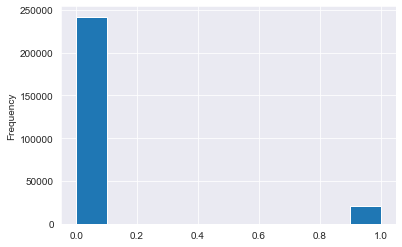

In [51]:
application_train['TARGET'].astype(int).plot.hist()

**--> les 2 catégories 0 et 1 ne sont pas équilibrées en termes d'effectif : environ 7,8% des prêts sont refusés**

#### b) Describe des variables numériques

In [52]:
application_train['SK_ID_CURR'].nunique()

262325

In [53]:
for i in var_num:
    print('------')
    print('Colonne : ', i)
    print('Nb valeurs uniques prises :', application_train[i].nunique(), '(nb total lignes : ', application_train.shape[0], ')')
    print(application_train[i].describe())

------
Colonne :  SK_ID_CURR
Nb valeurs uniques prises : 262325 (nb total lignes :  262325 )
count    262325.000000
mean     278234.484277
std      102797.067626
min      100002.000000
25%      189170.000000
50%      278291.000000
75%      367239.000000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
------
Colonne :  TARGET
Nb valeurs uniques prises : 2 (nb total lignes :  262325 )
count    262325.000000
mean          0.078128
std           0.268374
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
------
Colonne :  CNT_CHILDREN
Nb valeurs uniques prises : 15 (nb total lignes :  262325 )
count    262325.000000
mean          0.437381
std           0.729964
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
------
Colonne :  AMT_INCOME_TOTAL
Nb valeurs uniques prises : 2247 (nb total ligne

Nb valeurs uniques prises : 3780 (nb total lignes :  262325 )
count    127567.000000
mean          0.088442
std           0.082438
min           0.000000
25%           0.044200
50%           0.076300
75%           0.112200
max           1.000000
Name: BASEMENTAREA_AVG, dtype: float64
------
Colonne :  YEARS_BEGINEXPLUATATION_AVG
Nb valeurs uniques prises : 285 (nb total lignes :  262325 )
count    157469.000000
mean          0.977735
std           0.059230
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64
------
Colonne :  YEARS_BUILD_AVG
Nb valeurs uniques prises : 149 (nb total lignes :  262325 )
count    103023.000000
mean          0.752471
std           0.113280
min           0.000000
25%           0.687200
50%           0.755200
75%           0.823200
max           1.000000
Name: YEARS_BUILD_AVG, dtype: float64
------
Colonne :  COMMONAREA_AVG
Nb valeurs uniques prise

count    103023.000000
mean          0.755746
std           0.112066
min           0.000000
25%           0.691400
50%           0.758500
75%           0.825600
max           1.000000
Name: YEARS_BUILD_MEDI, dtype: float64
------
Colonne :  COMMONAREA_MEDI
Nb valeurs uniques prises : 3202 (nb total lignes :  262325 )
count    92646.000000
mean         0.044595
std          0.076144
min          0.000000
25%          0.007900
50%          0.020800
75%          0.051300
max          1.000000
Name: COMMONAREA_MEDI, dtype: float64
------
Colonne :  ELEVATORS_MEDI
Nb valeurs uniques prises : 46 (nb total lignes :  262325 )
count    143620.000000
mean          0.078078
std           0.134467
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_MEDI, dtype: float64
------
Colonne :  ENTRANCES_MEDI
Nb valeurs uniques prises : 46 (nb total lignes :  262325 )
count    152683.000000
mean          0.149213
std           

Nb valeurs uniques prises : 2 (nb total lignes :  262325 )
count    262325.000000
mean          0.000591
std           0.024301
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_20, dtype: float64
------
Colonne :  FLAG_DOCUMENT_21
Nb valeurs uniques prises : 2 (nb total lignes :  262325 )
count    262325.000000
mean          0.000355
std           0.018825
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_21, dtype: float64
------
Colonne :  AMT_REQ_CREDIT_BUREAU_HOUR
Nb valeurs uniques prises : 5 (nb total lignes :  262325 )
count    242408.000000
mean          0.006456
std           0.084306
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
------
Colonne :  AMT_REQ_CREDIT_BUREAU_DAY
Nb valeurs uniques p

**Nous allons examiner plus en détail :  
DAYS_BIRTH (valeurs négatives)  
DAYS_EMPLOYED (valeurs négatives)  
DAYS_REGISTRATION (valeurs négatives)  
DAYS_ID_PUBLISH (valeurs négatives)  
OBS_30_CNT_SOCIAL_CIRCLE (outlier manifeste)  
DEF_30_CNT_SOCIAL_CIRCLE (outlier manifeste)  
OBS_60_CNT_SOCIAL_CIRCLE (outlier manifeste)  
DEF_60_CNT_SOCIAL_CIRCLE (outlier manifeste)  
DAYS_LAST_PHONE_CHANGE (valeurs négatives)  
AMT_REQ_CREDIT_BUREAU_MON (outlier manifeste)  
AMT_REQ_CREDIT_BUREAU_YEAR (outlier manifeste)**

#### c) Gestion des valeurs abérrantes

**DAYS_BIRTH**

Text(0.5, 0, 'DAYS_BIRTH')

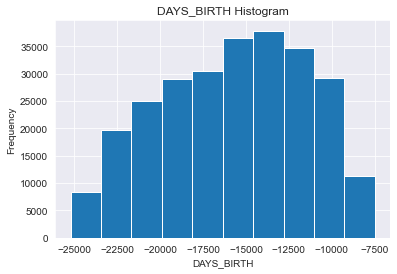

In [54]:
application_train['DAYS_BIRTH'].plot.hist(title = 'DAYS_BIRTH Histogram')
plt.xlabel('DAYS_BIRTH')

**--> à priori pas de valeurs abérrantes**

**On va passer cette variable en valeur absolue (on imagine l'utiliser pour le dashboard) :**

In [55]:
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])

# de même pour application_test :
application_test['DAYS_BIRTH'] = abs(application_test['DAYS_BIRTH'])

**DAYS_EMPLOYED**

Text(0.5, 0, 'DAYS_EMPLOYED')

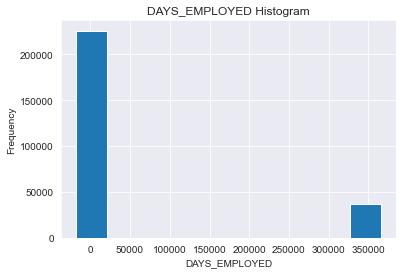

In [56]:
application_train['DAYS_EMPLOYED'].plot.hist(title = 'DAYS_EMPLOYED Histogram')
plt.xlabel('DAYS_EMPLOYED')

**Nous avons visiblement des valeurs abérrantes !**

In [57]:
application_train[application_train['DAYS_EMPLOYED']>50000].head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
6,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099,365243,-7427.0,-3514,NaN,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.587334,0.205747,0.751724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
8,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,20417,365243,-5246.0,-2512,NaN,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.722044,0.555183,0.652897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
19,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,24827,365243,-9012.0,-3684,NaN,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,NaN,0.624305,0.669057,0.1443,0.0848,0.9876,0.830,0.1064,0.14,0.1207,0.3750,0.4167,0.2371,0.1173,0.1484,0.0019,0.0007,0.1261,0.0754,0.9876,0.8367,0.0000,0.1208,0.1034,0.3750,0.4167,0.2425,0.1102,0.0923,0.0000,0.0000,0.1457,0.0848,0.9876,0.8323,0.1071,0.14,0.1207,0.3750,0.4167,0.2412,0.1193,0.1510,0.0019,0.0007,org spec account,block of flats,0.1640,Mixed,No,0.0,0.0,0.0,0.0,-795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
34,100045,0,Cash loans,F,N,Y,0,99000.000,247275

**Nous allons remplacer toutes les valeurs = 365243 par NaN :**

In [58]:
application_train['DAYS_EMPLOYED'] = application_train['DAYS_EMPLOYED'].replace(365243,np.nan)

# même chose sur application_test :
application_test['DAYS_EMPLOYED'] = application_test['DAYS_EMPLOYED'].replace(365243,np.nan)

Text(0.5, 0, 'DAYS_EMPLOYED')

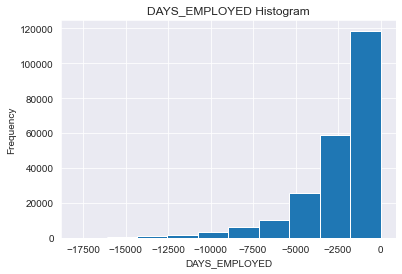

In [59]:
application_train['DAYS_EMPLOYED'].plot.hist(title = 'DAYS_EMPLOYED Histogram')
plt.xlabel('DAYS_EMPLOYED')

**On va passer cette variable en valeur absolue (on imagine l'utiliser pour le dashboard) :**

In [60]:
application_train['DAYS_EMPLOYED'] = abs(application_train['DAYS_EMPLOYED'])

# de même pour application_test :
application_test['DAYS_EMPLOYED'] = abs(application_test['DAYS_EMPLOYED'])

**DAYS_REGISTRATION**

Text(0.5, 0, 'DAYS_REGISTRATION')

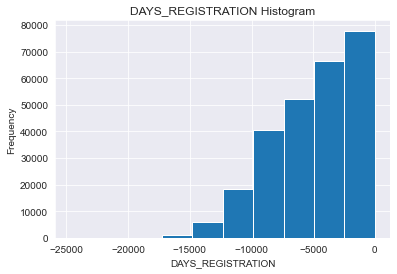

In [61]:
application_train['DAYS_REGISTRATION'].plot.hist(title = 'DAYS_REGISTRATION Histogram')
plt.xlabel('DAYS_REGISTRATION')

**--> à priori pas de valeurs abérrantes**

**DAYS_ID_PUBLISH**

Text(0.5, 0, 'DAYS_ID_PUBLISH')

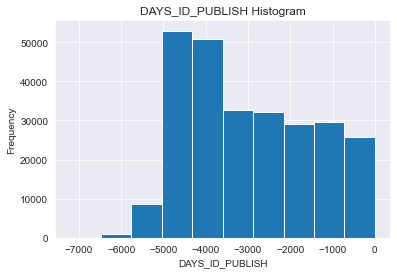

In [62]:
application_train['DAYS_ID_PUBLISH'].plot.hist(title = 'DAYS_ID_PUBLISH Histogram')
plt.xlabel('DAYS_ID_PUBLISH')

**--> à priori pas de valeurs abérrantes**

**OBS_30_CNT_SOCIAL_CIRCLE**

Text(0.5, 0, 'OBS_30_CNT_SOCIAL_CIRCLE')

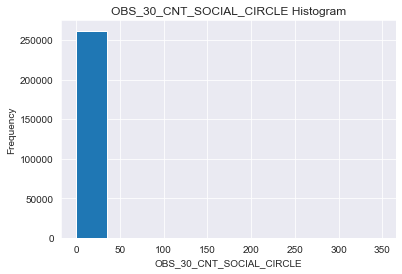

In [63]:
application_train['OBS_30_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'OBS_30_CNT_SOCIAL_CIRCLE Histogram')
plt.xlabel('OBS_30_CNT_SOCIAL_CIRCLE')

In [64]:
application_train[application_train['OBS_30_CNT_SOCIAL_CIRCLE']>300]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
126538,272071,0,Revolving loans,M,N,Y,0,202500.0,180000.0,9000.0,180000.0,Family,State servant,Higher education,Single / not married,House / apartment,0.020246,10111,1917.0,-2306.0,-2306,NaN,1,1,0,1,0,0,Core staff,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,Police,0.360649,0.304506,0.357293,NaN,0.0306,0.9866,0.8164,NaN,0.12,0.0345,0.3333,0.375,NaN,0.0303,0.0235,NaN,NaN,NaN,0.0317,0.9866,0.8236,NaN,0.1208,0.0345,0.3333,0.375,NaN,0.0331,0.0245,NaN,NaN,NaN,0.0306,0.9866,0.8189,NaN,0.12,0.0345,0.3333,0.375,NaN,0.0308,0.0239,NaN,NaN,reg oper account,block of flats,0.0299,Panel,No,348.0,34.0,344.0,24.0,-667.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,3.0


**Nous avons visiblement une valeur abérrante ! Nous la remplaçons par NaN :**

In [65]:
application_train['OBS_30_CNT_SOCIAL_CIRCLE'].values[application_train['OBS_30_CNT_SOCIAL_CIRCLE']>300] = np.nan

# même chose pour application_test :
application_test['OBS_30_CNT_SOCIAL_CIRCLE'].values[application_test['OBS_30_CNT_SOCIAL_CIRCLE']>300] = np.nan

Text(0.5, 0, 'OBS_30_CNT_SOCIAL_CIRCLE')

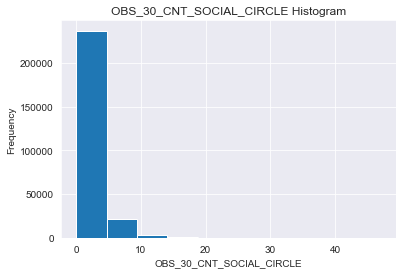

In [66]:
application_train['OBS_30_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'OBS_30_CNT_SOCIAL_CIRCLE Histogram')
plt.xlabel('OBS_30_CNT_SOCIAL_CIRCLE')

**DEF_30_CNT_SOCIAL_CIRCLE**

Text(0.5, 0, 'DEF_30_CNT_SOCIAL_CIRCLE')

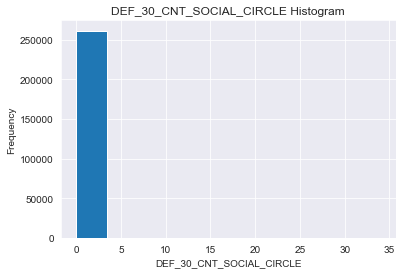

In [67]:
application_train['DEF_30_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'DEF_30_CNT_SOCIAL_CIRCLE Histogram')
plt.xlabel('DEF_30_CNT_SOCIAL_CIRCLE')

In [68]:
application_train[application_train['DEF_30_CNT_SOCIAL_CIRCLE']>30]['DEF_30_CNT_SOCIAL_CIRCLE']

126538    34.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

**Au vu de l'ordre de grandeur, il s'agit peut-être simplmement d'un outlier. Nous le conservons.**

**OBS_60_CNT_SOCIAL_CIRCLE**

Text(0.5, 0, 'OBS_60_CNT_SOCIAL_CIRCLE')

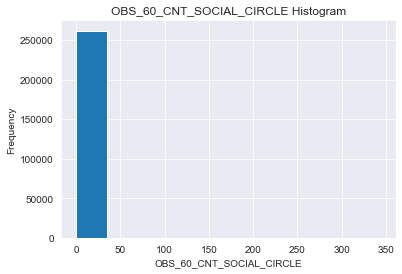

In [69]:
application_train['OBS_60_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'OBS_60_CNT_SOCIAL_CIRCLE Histogram')
plt.xlabel('OBS_60_CNT_SOCIAL_CIRCLE')

In [70]:
application_train[application_train['OBS_60_CNT_SOCIAL_CIRCLE']>300]['OBS_60_CNT_SOCIAL_CIRCLE']

126538    344.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

**Nous avons visiblement une valeur abérrante ! Nous la remplaçons par NaN :**

In [71]:
application_train['OBS_60_CNT_SOCIAL_CIRCLE'].values[application_train['OBS_60_CNT_SOCIAL_CIRCLE']>300] = np.nan

# même chose pour application_test :
application_test['OBS_60_CNT_SOCIAL_CIRCLE'].values[application_test['OBS_60_CNT_SOCIAL_CIRCLE']>300] = np.nan

Text(0.5, 0, 'OBS_30_CNT_SOCIAL_CIRCLE')

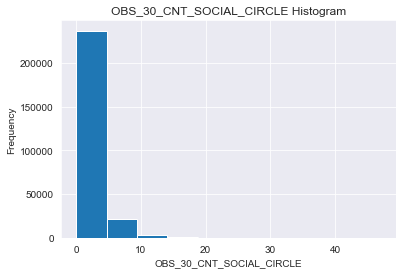

In [72]:
application_train['OBS_30_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'OBS_30_CNT_SOCIAL_CIRCLE Histogram')
plt.xlabel('OBS_30_CNT_SOCIAL_CIRCLE')

**DEF_60_CNT_SOCIAL_CIRCLE**

Text(0.5, 0, 'DEF_60_CNT_SOCIAL_CIRCLE')

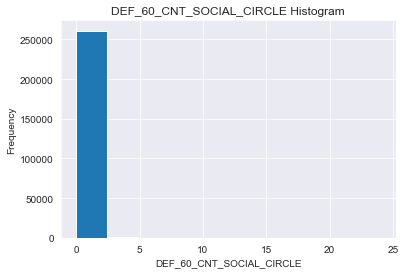

In [73]:
application_train['DEF_60_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'DEF_60_CNT_SOCIAL_CIRCLE Histogram')
plt.xlabel('DEF_60_CNT_SOCIAL_CIRCLE')

In [74]:
application_train[application_train['DEF_60_CNT_SOCIAL_CIRCLE']>20]['DEF_60_CNT_SOCIAL_CIRCLE']

126538    24.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

**Au vu de l'ordre de grandeur, il s'agit peut-être simplement d'un outlier. Nous le conservons.**

**DAYS_LAST_PHONE_CHANGE**

Text(0.5, 0, 'DAYS_LAST_PHONE_CHANGE')

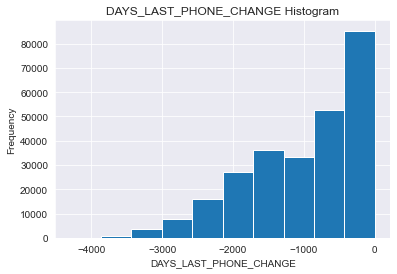

In [75]:
application_train['DAYS_LAST_PHONE_CHANGE'].plot.hist(title = 'DAYS_LAST_PHONE_CHANGE Histogram')
plt.xlabel('DAYS_LAST_PHONE_CHANGE')

**--> à priori pas de valeurs abérrantes**

**AMT_REQ_CREDIT_BUREAU_MON**

Text(0.5, 0, 'AMT_REQ_CREDIT_BUREAU_MON')

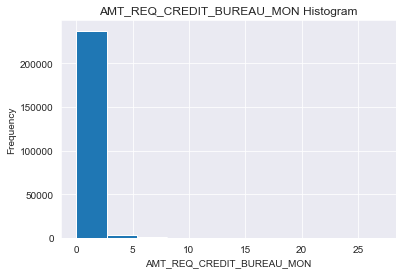

In [76]:
application_train['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(title = 'AMT_REQ_CREDIT_BUREAU_MON Histogram')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_MON')

In [77]:
application_train[application_train['AMT_REQ_CREDIT_BUREAU_MON']>20]['AMT_REQ_CREDIT_BUREAU_MON']

10972     24.0
75241     23.0
216217    27.0
226942    22.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

**Au vu de l'ordre de grandeur, il s'agit peut-être simplement d'outliers. Nous les conservons.**

**AMT_REQ_CREDIT_BUREAU_YEAR**

Text(0.5, 0, 'AMT_REQ_CREDIT_BUREAU_YEAR')

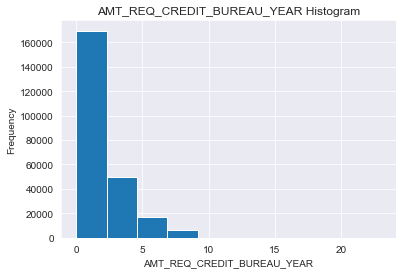

In [78]:
application_train['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(title = 'AMT_REQ_CREDIT_BUREAU_YEAR Histogram')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_YEAR')

In [79]:
application_train[application_train['AMT_REQ_CREDIT_BUREAU_YEAR']>20]['AMT_REQ_CREDIT_BUREAU_YEAR']

25221     23.0
65374     22.0
113201    21.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

**Au vu de l'ordre de grandeur, il s'agit peut-être simplement d'outliers. Nous les conservons.**

In [80]:
application_train = application_train.reset_index(drop=True)

### 4 - Analyses bivariées

**Recherchons les variables numériques corrélées avec "TARGET" :**

In [81]:
# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 FLAG_WORK_PHONE                0.025468
LIVE_CITY_NOT_WORK_CITY        0.028839
DEF_60_CNT_SOCIAL_CIRCLE       0.030863
DEF_30_CNT_SOCIAL_CIRCLE       0.032263
OWN_CAR_AGE                    0.038698
REG_CITY_NOT_LIVE_CITY         0.039396
DAYS_REGISTRATION              0.039987
FLAG_EMP_PHONE                 0.043431
FLAG_DOCUMENT_3                0.045488
REG_CITY_NOT_WORK_CITY         0.045511
DAYS_ID_PUBLISH                0.047345
DAYS_LAST_PHONE_CHANGE         0.051066
REGION_RATING_CLIENT           0.056136
REGION_RATING_CLIENT_W_CITY    0.058300
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178462
EXT_SOURCE_2                 -0.157166
EXT_SOURCE_1                 -0.154505
DAYS_BIRTH                   -0.076206
DAYS_EMPLOYED                -0.072867
FLOORSMAX_AVG                -0.044012
FLOORSMAX_MEDI               -0.043777
FLOORSMAX_MODE               -0.043235


#### a) DAYS_BIRTH

**La variable la plus fortement corrélée positivement à TARGET est DAYS_BIRTH (0.076, ce qui reste très faible !)**  
**Nous allons observer la répartition de l'âge des clients (en prenant la valeur absolue de DAY_BIRTH et en divisant par 365)**

Text(0, 0.5, 'Count')

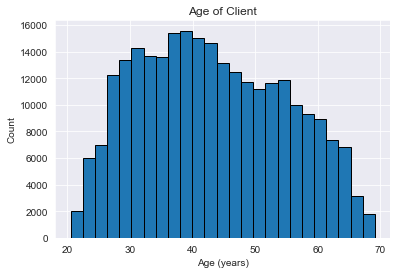

In [82]:
# Plot the distribution of ages in years
plt.hist(abs(application_train['DAYS_BIRTH']) / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

**Observons la probabilité de ne pas rembourser le prêt en fonction de la catégorie d'âge :**

In [83]:
# Age information into a separate dataframe
age_data = abs(application_train[['TARGET', 'DAYS_BIRTH']])
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(5)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,16941,46.413699,"(45.0, 50.0]"
4,0,13778,37.747945,"(35.0, 40.0]"


In [84]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.118698,8544.138964,23.408600
"(25.0, 30.0]",0.107360,10161.426022,27.839523
"(30.0, 35.0]",0.097431,11855.078771,32.479668
"(35.0, 40.0]",0.085935,13708.048823,37.556298
"(40.0, 45.0]",0.075026,15496.353507,42.455763
"(45.0, 50.0]",0.071454,17323.585991,47.461879
"(50.0, 55.0]",0.063696,19190.283416,52.576119
"(55.0, 60.0]",0.051766,20973.990319,57.462987
"(60.0, 65.0]",0.049294,22773.648656,62.393558


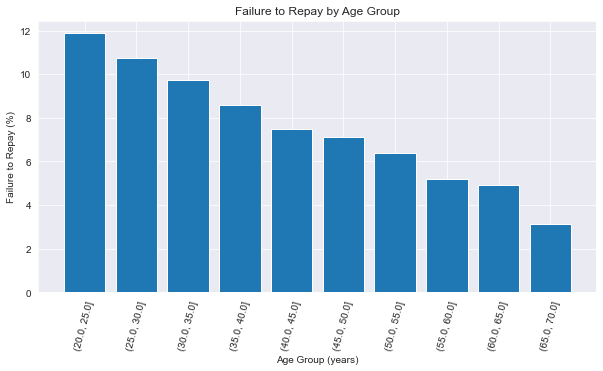

In [85]:
plt.figure(figsize = (10, 5))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

**--> on remarque que les clients les plus jeunes ont plus de probabilité de ne pas rembourser le prêt !! Cette variable a donc bel et bien de l'influence sur notre target**

#### b) DAYS_EMPLOYED

In [86]:
# Age information into a separate dataframe
employment_data = abs(application_train[['TARGET', 'DAYS_EMPLOYED']])
employment_data['YEARS_EMPLOYMENT'] = employment_data['DAYS_EMPLOYED'] / 365

# Bin the age data
employment_data['YEARS_BINNED'] = pd.cut(employment_data['YEARS_EMPLOYMENT'], bins = np.linspace(0, 50, num = 11))
employment_data.head(5)

,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYMENT,YEARS_BINNED
0,1,637.0,1.745205,"(0.0, 5.0]"
1,0,1188.0,3.254795,"(0.0, 5.0]"
2,0,225.0,0.616438,"(0.0, 5.0]"
3,0,1588.0,4.350685,"(0.0, 5.0]"
4,0,3130.0,8.575342,"(5.0, 10.0]"


In [87]:
# Group by the bin and calculate averages
employment_groups  = employment_data.groupby('YEARS_BINNED').mean()
employment_groups

,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYMENT
YEARS_BINNED,,,
"(0.0, 5.0]",0.101127,866.742979,2.374638
"(5.0, 10.0]",0.071173,2632.965591,7.213604
"(10.0, 15.0]",0.055835,4466.539676,12.237095
"(15.0, 20.0]",0.047442,6308.032798,17.282282
"(20.0, 25.0]",0.046872,8092.698205,22.171776
"(25.0, 30.0]",0.037414,9964.497539,27.299993
"(30.0, 35.0]",0.039182,11790.546848,32.302868
"(35.0, 40.0]",0.018253,13521.940026,37.046411
"(40.0, 45.0]",0.005181,15320.165803,41.973057


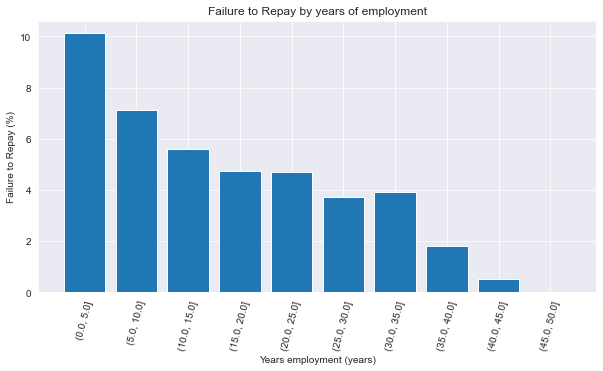

In [88]:
plt.figure(figsize = (10, 5))

# Graph the age bins and the average of the target as a bar plot
plt.bar(employment_groups.index.astype(str), 100 * employment_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Years employment (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by years of employment');

**--> logiquement avec la conclusion précédente sur l'âge, on remarque que les clients qui travaillent depuis moins longtemps ont plus de probabilité de ne pas rembourser le prêt. Cette variable a donc bel et bien de l'influence sur notre target**

#### c) EXT_SOURCE_1 - EXT_SOURCE_2 - EXT_SOURCE_3

**Ces 3 variables sont les plus corrélées négativement à TARGET. Nous allons d'abord afficher les graphiques KDE en séparant par target 0/1 :**

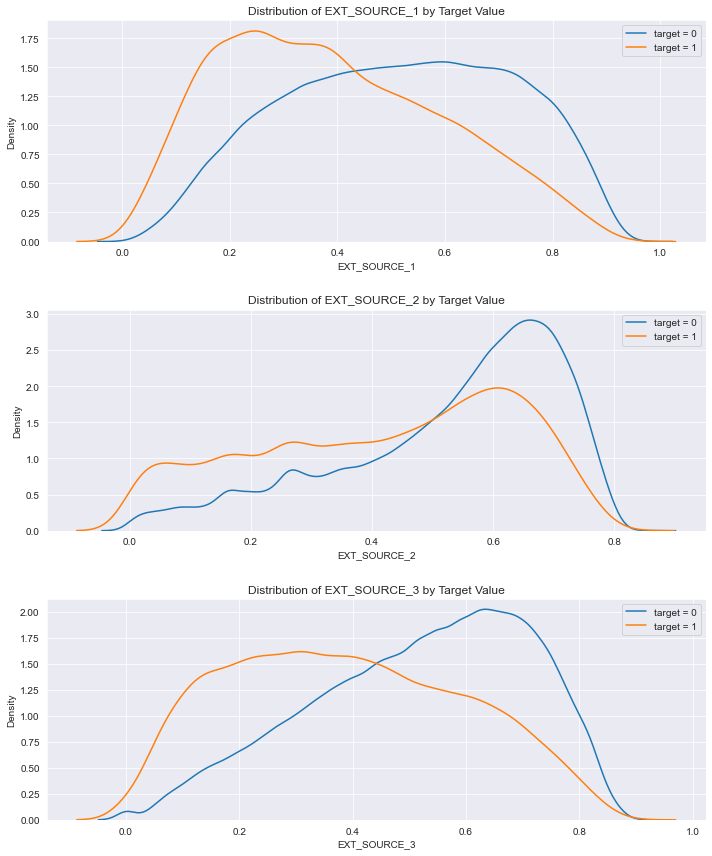

In [89]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label = 'target = 0')
    # plot loans that were not repaid
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label = 'target = 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)

**--> EXT_SOURCE_3 présente en effet 2 distributions distinctes pour target 0 et 1, mêmes si les courbes se chevauchent. C'est aussi le cas pour EXT_SOURCE_1 dans une moindre mesure, et ce n'est manifestement pas le cas pour EXT_SOURCE_2**

#### d) Matrice de corrélations avec ces variables

**On utilisera les valeurs absolues de DAYS_BIRTH et DAYS_EMPLOYED**

In [90]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED']].copy()
ext_data.loc[:, 'DAYS_BIRTH'] = abs(ext_data['DAYS_BIRTH'])
ext_data.loc[:, 'DAYS_EMPLOYED'] = abs(ext_data['DAYS_EMPLOYED'])
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED
TARGET,1.000000,-0.154505,-0.157166,-0.178462,-0.076206,-0.072867
EXT_SOURCE_1,-0.154505,1.000000,0.210731,0.186940,0.595986,0.249258
EXT_SOURCE_2,-0.157166,0.210731,1.000000,0.112663,0.109354,0.090837
EXT_SOURCE_3,-0.178462,0.186940,0.112663,1.000000,0.201805,0.129881
DAYS_BIRTH,-0.076206,0.595986,0.109354,0.201805,1.000000,0.351486
DAYS_EMPLOYED,-0.072867,0.249258,0.090837,0.129881,0.351486,1.000000


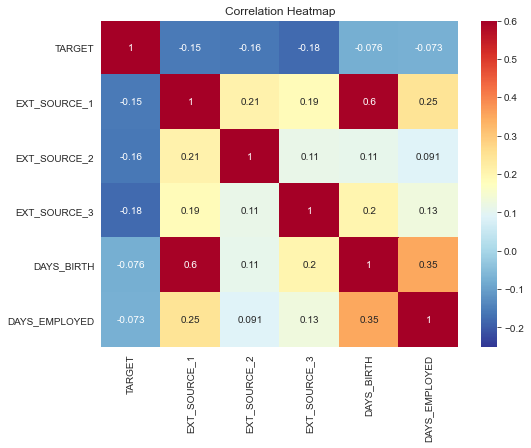

In [91]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

**--> On remarque que DAYS_BIRTH, passé en valeur absolue, est corrélé à EXT_SOURCE_1 avec un coefficient de 0,6. Cette variable opaque prend très probablement en compte l'âge des emprunteurs.  
DAYS_EMPLOYED est également très modérémment corrélé à DAYS_BIRTH (0,25), ce qui est logique puisque plus quelqu'un est âgé, plus il a de chances d'avoir une longue carrière professionnelle**

#### e) Variables catégorielles : test du Chi²

**Nous allons tester si les variables catégorielles sont à priori indépendantes de TARGET :**

In [92]:
from scipy.stats import chi2_contingency

p_value = []

for i in var_cat:
    contigency_pct = pd.crosstab(application_train[i], application_train['TARGET'], normalize='all')
    c, p, dof, expected = chi2_contingency(contigency_pct)
    p_value.append(p) 

**L'hypothèse nulle est que les 2 variables sont indépendantes. Si p > 0,05 on accepte l'hypothèse nulle :**

In [93]:
chi2 = pd.DataFrame(list(zip(var_cat, p_value)), columns =['variable', 'p_value']).sort_values('p_value').reset_index(drop=True)
chi2['independancy'] = np.where(chi2['p_value']>=0.05, 'yes', 'no')

In [94]:
chi2

,variable,p_value,independancy
0,EMERGENCYSTATE_MODE,1.123880e-60,no
1,NAME_CONTRACT_TYPE,3.635249e-10,no
2,FLAG_OWN_REALTY,5.688468e-05,no
3,FLAG_OWN_CAR,1.262045e-04,no
4,CODE_GENDER,9.986933e-01,yes
5,HOUSETYPE_MODE,9.999096e-01,yes
6,NAME_EDUCATION_TYPE,9.999986e-01,yes
7,FONDKAPREMONT_MODE,9.999994e-01,yes
8,NAME_FAMILY_STATUS,1.000000e+00,yes
9,NAME_HOUSING_TYPE,1.000000e+00,yes


**Conclusion des analyses bivariées :**

**--> On en déduit que les variables numériques :  
DAYS_BIRTH  
DAYS_EMPLOYED  
EXT_SOURCE_1  
EXT_SOURCE_2  
EXT_SOURCE_3**  

**et les variables catégorielles:  
EMERGENCYSTATE_MODE  
NAME_CONTRACT_TYPE  
FLAG_OWN_REALTY  
FLAG_OWN_CAR**  

**Sont à priori dépendantes de TARGET**

**Suite aux manipulations effectuées sur ces bases de données, nous sauvegardons application_train et application_test :**

In [95]:
application_train_save = application_train.copy()
application_test_save = application_test.copy()

---------------------

## <center>4) Baseline</center>

**Nous allons créer une baseline simple avec un rapide feature engineering sur les variables visiblement dépendante de TARGET :**

In [96]:
var_num_selec = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
var_cat_selec = ['EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR']

In [97]:
data = application_train.copy()
data = data[var_num_selec+var_cat_selec]

In [98]:
data.head(5)

,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,EMERGENCYSTATE_MODE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,FLAG_OWN_CAR
0,9461,637.0,0.083037,0.262949,0.139376,No,Cash loans,Y,N
1,16765,1188.0,0.311267,0.622246,NaN,No,Cash loans,N,N
2,19046,225.0,NaN,0.555912,0.729567,NaN,Revolving loans,Y,Y
3,16941,1588.0,NaN,0.354225,0.621226,NaN,Cash loans,Y,N
4,13778,3130.0,0.774761,0.724000,0.492060,NaN,Cash loans,Y,Y


**Feature engineering :**

In [99]:
y = application_train['TARGET']

from sklearn.model_selection import train_test_split

data_train, data_test, y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y, random_state=0)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

data_train_num = data_train[var_num_selec]
data_test_num = data_test[var_num_selec]

data_train_num = pd.DataFrame(imputer.fit_transform(data_train_num), columns = var_num_selec).reset_index(drop=True)
data_test_num =  pd.DataFrame(imputer.transform(data_test_num), columns = var_num_selec).reset_index(drop=True)

data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

for i in var_num_selec:
    data_train[i] = data_train_num[i]
    data_test[i] = data_test_num[i]

data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

print(data_train.columns.symmetric_difference(data_test.columns))

Index([], dtype='object')


**Modélisation et score :**

In [100]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)

start_time = time.time()

rfc.fit(data_train, y_train)
y_pred = rfc.predict(data_test)
y_prob = rfc.predict_proba(data_test)[:,1]

exec_time = time.time() - start_time

print('Classifieur :', rfc)
print('-------')

print('Testing set accuracy : ', round(metrics.accuracy_score(y_test, y_pred),3))
print('ROC AUC Score : ', round(metrics.roc_auc_score(y_test, y_prob),3))
print('F1 Score : ', round(metrics.f1_score(y_test, y_pred),3))
print('-------')

print("Temps d'exécution : - %s seconds -" % "{:.2}".format(exec_time))

Classifieur : RandomForestClassifier()
-------
Testing set accuracy :  0.921
ROC AUC Score :  0.69
F1 Score :  0.032
-------
Temps d'exécution : - 5e+01 seconds -


**Matrice de confusion :**

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

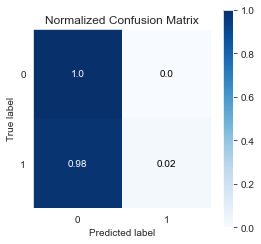

In [101]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred,
    figsize=(4, 4), normalize='All')

**Courbe ROC :**

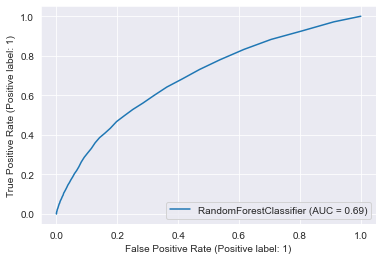

In [102]:
metrics.plot_roc_curve(rfc, data_test, y_test) 

**On va maintenant utiliser le feature_importance :**

In [103]:
L_name_y = []
L_importance_y = []

for name, importance in zip(data_train.columns, rfc.feature_importances_):
    L_name_y.append(name)
    L_importance_y.append(importance)

features_y = pd.DataFrame(L_name_y, L_importance_y)
features_y['Importance_y'] = features_y.index
features_y.columns.values[0] = "Features"
features_y = features_y.sort_values('Importance_y', ascending=False).reset_index(drop=True)

In [104]:
features_y

,Features,Importance_y
0,EXT_SOURCE_2,0.238124
1,DAYS_BIRTH,0.215043
2,DAYS_EMPLOYED,0.194372
3,EXT_SOURCE_3,0.190986
4,EXT_SOURCE_1,0.121535
5,EMERGENCYSTATE_MODE_No,0.011400
6,FLAG_OWN_REALTY_N,0.006594
7,FLAG_OWN_REALTY_Y,0.006563
8,FLAG_OWN_CAR_N,0.004395
9,FLAG_OWN_CAR_Y,0.004327


**Bilan Baseline :**

**--> On remarque un très bon taux d'accuracy (0,921) mais un score AUC peu satisfaisant (0,69). C'est normal, car avec une TARGET très déséquilibrée (7,8% de 1 - 92,2% de 0), il suffit que notre classifieur ne prédise que des 0 pour avoir une bonne accuracy !**  
**De plus, par rapport à notre problématique : nous préférons avoir des faux-positifs plutôt que des faux négatifs. Or la matrice de confusion nous indique que notre classifieur privilégie l'inverse.**
**Cette baseline n'est donc pas convaincante**

---------------------------

## <center>5) Feature engineering</center>

**On va créer une fonction de paramétrage avec :**  
- Séparation train / test
- Création ou non de variables polynomiales
- Passage ou non au ln(x+1)
- Standard Scaler ou non
- Variables catégorielles en one-hot

In [105]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import skew
from sklearn import preprocessing


def parametrage(data, y, pos, poly_deg, ln, std):
    global var_num_selec, cols

    data_train, data_test, y_train, y_test = train_test_split(
        data, y, test_size=0.2, stratify=y, random_state=0)

    # conservation des index train/test
    train_indexes = data_train.index
    test_indexes = data_test.index

    data_train_num = data_train[var_num_selec]
    data_test_num = data_test[var_num_selec]

    # ---------------------------- #
    # 1 - IMPUTATION MANQUANTS numériques
    imputer = IterativeImputer(
        initial_strategy='median', random_state=0)
    imputer.fit(data_train_num)

    # train
    data_temp_train = imputer.transform(data_train_num)
    data_temp_train = pd.DataFrame(data_temp_train).set_index(train_indexes)
    data_temp_train.columns = data_train_num.columns

    # test
    data_temp_test = imputer.transform(data_test_num)
    data_temp_test = pd.DataFrame(data_temp_test).set_index(test_indexes)
    data_temp_test.columns = data_test_num.columns

    # imputation
    for i in data_temp_train.columns:
        data_train.loc[:, i] = data_temp_train[i]
        data_test.loc[:, i] = data_temp_test[i]

    # ---------------------------- #
    #  2 - Ajout du min pour les valeurs négatives
    if pos == 1:
        for i in var_num_selec:
            if any(data_train[i] < 0) == True:
                data_train[i] = data_train[i]+abs(data_train[i].min())
            if any(data_test[i] < 0) == True:
                data_test[i] = data_test[i]+abs(data_test[i].min())

        for j in var_num_selec:
            if any(data_train[j] < 0) == True:
                print('ERREUR : Après opération "POS", valeurs négatives dans', j)

    # ---------------------------- #
    # 3 - VARIABLES POLYNOMIALES
    if poly_deg >= 2:
        poly_train = data_train[var_num_selec]
        poly_test = data_test[var_num_selec]
        poly_transformer = PolynomialFeatures(degree=poly_deg)
        poly_transformer.fit(poly_train)

        # Transformation
        poly_train = poly_transformer.transform(poly_train)
        poly_test = poly_transformer.transform(poly_test)

        # On sauvegarde les colonnes et on recréé 2 DF :
        cols = poly_transformer.get_feature_names(
            input_features=data_train.columns)
        poly_train = pd.DataFrame(poly_train, columns=cols).set_index(
            train_indexes).drop(columns='1')
        poly_test = pd.DataFrame(poly_test, columns=cols).set_index(
            test_indexes).drop(columns='1')

        # On concatène pour avoir toutes les variables :
        data_train = data_train[var_cat_selec].join(poly_train)
        data_test = data_test[var_cat_selec].join(poly_test)

        # On modifie "var_num_selec" :
        var_num_selec = data_train.columns.symmetric_difference(var_cat_selec)

    # ---------------------------- #
    # 4 - PASSAGE AU LN(X+1)
    if ln > 0:
        var_log = []
        data_train = data_train.reset_index(drop=True)
        data_test = data_test.reset_index(drop=True)
        for i in var_num_selec:
            s = skew(data_train[i])
            if s >= 2:  # on choisit 2 comme seuil de "skewness"
                var_log.append(i)

        for j in var_log:
            if any(data_train[j] < 0) == True:
                print('valeur négative :')
            data_train.loc[:, j] = np.log(data_train[j]+1)
            data_test.loc[:, j] = np.log(data_test[j]+1)
        data_train = data_train.set_index(train_indexes)
        data_test = data_test.set_index(test_indexes)

    # ---------------------------- #
    # 5 - STANDARD SCALER
    if std == 1:
        std_train = data_train[var_num_selec]
        std_test = data_test[var_num_selec]
        std_scale = preprocessing.StandardScaler().fit(std_train)
        std_train = std_scale.transform(std_train)
        std_test = std_scale.transform(std_test)
        # On créé 2 DF :
        std_train = pd.DataFrame(
            std_train, columns=var_num_selec).set_index(train_indexes)
        std_test = pd.DataFrame(
            std_test, columns=var_num_selec).set_index(test_indexes)

        # On remplace dans data :
        for i in var_num_selec:
            data_train.loc[:, i] = std_train[i]
            data_test.loc[:, i] = std_test[i]

    # ---------------------------- #
    # 6 - ENCODAGE ONE-HOT
    data_train = pd.get_dummies(data_train)
    data_test = pd.get_dummies(data_test)

    print('----------------------')
    print('TRAIN :')
    print('------')
    print('Shape :', data_train.shape)
    print('Manquants (% total):',
          data_train.isna().sum().sum()/data_train.shape[0])
    print('----------------------')
    print('TEST :')
    print('------')
    print('Shape :', data_test.shape)
    print('Manquants (% total):',
          data_test.isna().sum().sum()/data_test.shape[0])
    print('----------------------')
    print('Min à 0 pour variables à valeurs < 0 : NON' if pos ==
          0 else 'Min à 0 pour variables à valeurs < 0 : OUI')
    print('Variables polynomiales : NON' if poly_deg <
          2 else 'Variables polynomiales : degré {}'.format(poly_deg))
    print('ln(x+1) : NON' if ln == 0 else 'ln(x+1) : OUI')
    print('Std X : NON' if std == 0 else 'Std X : OUI')

    return data_train, data_test, y_train, y_test

In [106]:
var_num_selec = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
var_cat_selec = ['EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR']

In [107]:
data = application_train.copy()
data = data[var_num_selec+var_cat_selec]

In [108]:
# on supprime le message d'avertissement
pd.options.mode.chained_assignment = None

# On teste la fonction :
# parametrage(data, y, pos, poly_deg, ln, std):
data_train, data_test, y_train, y_test = parametrage(data, y, 1, 2, 1, 1)

----------------------
TRAIN :
------
Shape : (209860, 28)
Manquants (% total): 0.0
----------------------
TEST :
------
Shape : (52465, 28)
Manquants (% total): 0.0
----------------------
Min à 0 pour variables à valeurs < 0 : OUI
Variables polynomiales : degré 2
ln(x+1) : OUI
Std X : OUI


**<span style="color:red">Note sur l'imputation des manquants 'EMERGENCYSTATE_MODE' :</span>**

**Les valeurs prises sont "No" et "Yes". Puisqu'on passe les variables catégorielles en One-Hot, l'absence d'information sera traduite par 0 - 0 --> nous n'imputons pas les manquants.**

-----------------------------------

## <center>6) Modélisation</center>

### 1 - RandomForest + RegLog + LGBMClassifier | poly_deg = 2 | ln = OUI |  std = OUI

In [109]:
var_num_selec = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
var_cat_selec = ['EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR']

data = application_train.copy()
data = data[var_num_selec+var_cat_selec]

# Parametrage : DATA - y - pos = OUI - poly_deg = 2 - ln = OUI -  std = OUI):
data_train, data_test, y_train, y_test = parametrage(data, y, 1, 2, 1, 1)

----------------------
TRAIN :
------
Shape : (209860, 28)
Manquants (% total): 0.0
----------------------
TEST :
------
Shape : (52465, 28)
Manquants (% total): 0.0
----------------------
Min à 0 pour variables à valeurs < 0 : OUI
Variables polynomiales : degré 2
ln(x+1) : OUI
Std X : OUI


In [110]:
rfc = RandomForestClassifier(n_estimators = 20)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', max_iter=500)


import lightgbm as lgb
lgbm = lgb.LGBMClassifier(n_estimators=100, objective='binary',
                          class_weight='balanced',
                          learning_rate=0.05,
                          reg_alpha=0.1,
                          reg_lambda=0.01,
                          n_jobs=-1,
                          random_state=0)

for i in [rfc, lr, lgbm]:
    start_time = time.time()
    
    i.fit(data_train, y_train)
    y_pred = i.predict(data_test)
    y_prob = i.predict_proba(data_test)[:,1]
    
    exec_time = time.time() - start_time

    print('Classifieur :', i)
    print('-------')
    print('Testing set accuracy : ', round(metrics.accuracy_score(y_test, y_pred),3))
    print('ROC AUC Score : ', round(metrics.roc_auc_score(y_test, y_prob),3))
    print('F1 Score : ', round(metrics.f1_score(y_test, y_pred),3))

    print("Temps d'exécution : - %s seconds -" % "{:.2}".format(exec_time))
    print('--------------------------------------------------------------')

Classifieur : RandomForestClassifier(n_estimators=20)
-------
Testing set accuracy :  0.921
ROC AUC Score :  0.661
F1 Score :  0.052
Temps d'exécution : - 2.9e+01 seconds -
--------------------------------------------------------------
Classifieur : LogisticRegression(class_weight='balanced', max_iter=500)
-------
Testing set accuracy :  0.682
ROC AUC Score :  0.736
F1 Score :  0.244
Temps d'exécution : - 6.1 seconds -
--------------------------------------------------------------
Classifieur : LGBMClassifier(class_weight='balanced', learning_rate=0.05, objective='binary',
               random_state=0, reg_alpha=0.1, reg_lambda=0.01)
-------
Testing set accuracy :  0.689
ROC AUC Score :  0.737
F1 Score :  0.248
Temps d'exécution : - 4.3 seconds -
--------------------------------------------------------------


**--> Les meilleurs scores ROC AUC et F1 pour le classifieur LGBM. Observons la courbe ROC et la matrice de confusion pour ce dernier :**

In [111]:
lgbm.fit(data_train, y_train)
y_pred = lgbm.predict(data_test)
y_prob = lgbm.predict_proba(data_test)[:,1]

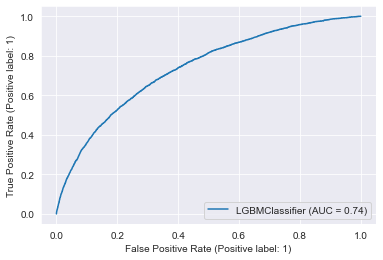

In [112]:
metrics.plot_roc_curve(lgbm, data_test, y_test) 

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

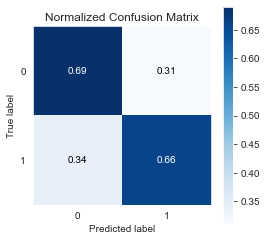

In [113]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(4,4), normalize='All')

**--> Par rapport à notre problématique, nous avons trop de Faux Négatifs (34% des 1 sont prédits en 0)**

### 2 - RegLog + LGBMClassifier | poly_deg = 0 | ln = NON |  std = NON

**Avec les 2 meilleurs classifieurs précédents, nous allons évaluer si notre feature engineering est utile ou non :**

In [114]:
var_num_selec = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
var_cat_selec = ['EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR']

data = application_train.copy()
data = data[var_num_selec+var_cat_selec]

# Parametrage : DATA - y - pos = NON - poly_deg = 0 - ln = NON -  std = NON):
data_train, data_test, y_train, y_test = parametrage(data, y, 0, 0, 0, 0)

----------------------
TRAIN :
------
Shape : (209860, 13)
Manquants (% total): 0.0
----------------------
TEST :
------
Shape : (52465, 13)
Manquants (% total): 0.0
----------------------
Min à 0 pour variables à valeurs < 0 : NON
Variables polynomiales : NON
ln(x+1) : NON
Std X : NON


In [115]:
lr = LogisticRegression(class_weight='balanced', max_iter=500)
lgbm = lgb.LGBMClassifier(n_estimators=100, objective='binary',
                          class_weight='balanced',
                          learning_rate=0.05,
                          reg_alpha=0.1,
                          reg_lambda=0.01,
                          n_jobs=-1,
                          random_state=0)


for i in [lr, lgbm]:
    start_time = time.time()
    
    i.fit(data_train, y_train)
    y_pred = i.predict(data_test)
    y_prob = i.predict_proba(data_test)[:,1]
    
    exec_time = time.time() - start_time

    print('Classifieur :', i)
    print('-------')
    print('Testing set accuracy : ', round(metrics.accuracy_score(y_test, y_pred),3))
    print('ROC AUC Score : ', round(metrics.roc_auc_score(y_test, y_prob),3))
    print('F1 Score : ', round(metrics.f1_score(y_test, y_pred),3))

    print("Temps d'exécution : - %s seconds -" % "{:.2}".format(exec_time))
    print('--------------------------------------------------------------')

Classifieur : LogisticRegression(class_weight='balanced', max_iter=500)
-------
Testing set accuracy :  0.574
ROC AUC Score :  0.581
F1 Score :  0.169
Temps d'exécution : - 0.5 seconds -
--------------------------------------------------------------
Classifieur : LGBMClassifier(class_weight='balanced', learning_rate=0.05, objective='binary',
               random_state=0, reg_alpha=0.1, reg_lambda=0.01)
-------
Testing set accuracy :  0.688
ROC AUC Score :  0.735
F1 Score :  0.247
Temps d'exécution : - 2.7 seconds -
--------------------------------------------------------------


**--> Notre feature engineering améliore siginificativement les performances de la régression logistique mais a peu d'impact sur le LGBM Classifier**

**Meilleurs résultats jusqu'ici :**  
Classifieur : LGBMClassifier()  
Testing set accuracy :  0.69  
ROC AUC Score :  0.737  
F1 Score :  0.248  
Temps d'exécution : - 3.9 seconds -  

### 3 - Amélioration du modèle

#### A) Ajout de variables via les autres bases de données disponibles

**En utilisant ce modèle kaggle :  
https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering  
Nous allons rajouter les bases de données "bureau" et "bureau_balance"**

**Aggregation de colonnes numériques : fonction générale**

In [116]:
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

**Aggregation de colonnes catégorielles : fonction générale**

In [117]:
def count_categorical(df, group_var, df_name):
    """Computes counts and normalized counts for each observation
    of `group_var` of each unique category in every categorical variable
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    group_var : string
        The variable by which to group the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with counts and normalized counts of each unique category in every categorical variable
        with one row for every unique value of the `group_var`.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

**Application de ces fonctions aux autres bases de données :**

In [118]:
# Counts of Bureau Dataframe
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')

# Aggregated Stats of Bureau Dataframe
bureau_agg = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')

# Value counts of Bureau Balance dataframe by loan
bureau_balance_counts = count_categorical(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')

# Aggregated stats of Bureau Balance dataframe by loan
bureau_balance_agg = agg_numeric(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')

# --- Aggregated Stats of Bureau Balance by Client ---
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

# Merge to include the SK_ID_CURR
bureau_by_loan = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan, on = 'SK_ID_BUREAU', how = 'left')

# Aggregate the stats for each client
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'client')

**Insertion des nouvelles features dans application_train et application_test :**

In [119]:
# Merge with the value counts of bureau
application_train = application_train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
application_test = application_test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
application_train = application_train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
application_test = application_test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the monthly information grouped by client
application_train = application_train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
application_test = application_test.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

**Nous créons également la variable PAYMENT_RATE = AMT_ANNUITY / AMT_CREDIT qui semble améliorer les résultats (d'après certains autres kernel) :**

In [120]:
application_train['PAYMENT_RATE'] = application_train['AMT_ANNUITY'] / application_train['AMT_CREDIT']
application_test['PAYMENT_RATE'] = application_test['AMT_ANNUITY'] / application_test['AMT_CREDIT']

In [121]:
application_train.shape

(262325, 334)

**--> Nous avons à présent 334 colonnes contre 122 avant ces manipulations**

In [122]:
application_train_save = application_train.copy()
application_test_save = application_test.copy()

#### B) Suppression de variables numériques trop corrélées entre elles

**On créé notre X sans 'TARGET' ni 'SK_ID_CURR' + notre y 'TARGET'. On recréé également les listes var_num et var_cat**

In [123]:
X = application_train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = application_train['TARGET']

del var_num
del var_cat

var_num = []
var_cat = []

for i in X.columns:
    if (X[i].dtypes == 'int64') | (X[i].dtypes == 'float64'):
        var_num.append(i)
    else:
        var_cat.append(i)

In [124]:
print('Nb var_num :', len(var_num))
print('Nb var_cat :', len(var_cat))

Nb var_num : 316
Nb var_cat : 16


**Modèle Kaggle :**  
**https://www.kaggle.com/boehmrya/preprocessing-feature-engineering-models**

In [125]:
# Calculate all correlations in dataframe
X_num = X[var_num]
corrs = X_num.corr()

In [126]:
# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])
    
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  135


In [127]:
len(cols_to_remove)

135

In [128]:
X_num = X_num.drop(columns = cols_to_remove)

In [129]:
for i in cols_to_remove:
    var_num.remove(i)

In [130]:
print('Nb var_num :', len(var_num))
print('Nb var_num + var_cat :', len(var_num + var_cat))

Nb var_num : 181
Nb var_num + var_cat : 197


In [131]:
X_num.shape

(262325, 181)

#### C) Sélection de variables : Kruskal Wallis/ANOVA et Chi²

**Comme nos cibles sont des catégories, nous allons plutôt utiliser l'ANOVA pour départager les variables numériques :**

**Imputation simple des manquants :**

In [132]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_num = pd.DataFrame(imputer.fit_transform(X_num), columns = X_num.columns)

**- Kruskal-Wallis -**

**Notre cible est déséquilibrée et nous n'avons pas de connaissances sur l'égalité des variances entre les populations 0 ou 1, nous privilégions donc un test de Kruskal Wallis :**

In [133]:
from scipy import stats

kruskal = []

for i in var_num:
    kruskal.append(stats.kruskal(X_num[i], y)[1])

In [134]:
kruskal_df = pd.DataFrame(list(zip(var_num, kruskal)), columns=[
                          'variable', 'p-value']).sort_values('p-value', ascending=True).reset_index(drop=True)

kruskal_df[kruskal_df['p-value']<0.05]

,variable,p-value
0,CNT_CHILDREN,0.000000e+00
1,bureau_DAYS_ENDDATE_FACT_max,0.000000e+00
2,bureau_AMT_CREDIT_MAX_OVERDUE_count,0.000000e+00
3,bureau_AMT_CREDIT_MAX_OVERDUE_mean,0.000000e+00
4,bureau_CNT_CREDIT_PROLONG_mean,0.000000e+00
...,...,...
176,client_bureau_balance_STATUS_C_count_min,3.854401e-26
177,bureau_AMT_CREDIT_SUM_DEBT_min,6.196514e-16
178,REG_CITY_NOT_LIVE_CITY,3.615769e-12
179,bureau_CREDIT_TYPE_Car loan_count,3.448045e-08


**Le test nous indique que toutes nos variables numériques présentes des médianes différentes lorsqu'on sépare les population TARGET = 0 et = 1. Voyons avec l'ANOVA :**

**- ANOVA -**

In [135]:
from sklearn.feature_selection import f_classif

anova = pd.DataFrame(f_classif(X_num, y)).transpose()

In [136]:
anova.columns = ['f-score','p-value']
anova['columns_name'] = X_num.columns

In [137]:
anova_selected = anova[anova['p-value'] < 0.05]
anova_selected = anova_selected.sort_values('p-value',ascending=True).reset_index(drop=True)
anova_selected.shape

(130, 3)

**Avec l'ANOVA, il reste 130 variables pour lequelles la p-value est < 0.05**  
**Nous selectionnons les X premières :**  
**<span style="color:red">NB : cette sélection fait partie du paramétrage, nous créons donc une fonction et nous n'appliquons rien directement sur application_train ou test</span>**

In [138]:
def selec_var_num(n_var):
    vnum = anova_selected['columns_name'].head(n_var).to_list()
    return vnum

In [139]:
# test
var_num_conserver = selec_var_num(50)
len(var_num_conserver)

50

In [140]:
print('Nb var_num :', len(var_num_conserver))
print('Nb var_num + var_cat :', len(var_num_conserver + var_cat))

Nb var_num : 50
Nb var_num + var_cat : 66


**- Chi² -**

In [141]:
p_value = []

for i in var_cat:
    contigency_pct = pd.crosstab(application_train[i], application_train['TARGET'], normalize='all')
    c, p, dof, expected = chi2_contingency(contigency_pct)
    p_value.append(p) 

In [142]:
chi2 = pd.DataFrame(list(zip(var_cat, p_value)), columns =['variable', 'p_value']).sort_values('p_value').reset_index(drop=True)
chi2['independancy'] = np.where(chi2['p_value']>=0.05, 'yes', 'no')

In [143]:
chi2

,variable,p_value,independancy
0,EMERGENCYSTATE_MODE,1.123880e-60,no
1,NAME_CONTRACT_TYPE,3.635249e-10,no
2,FLAG_OWN_REALTY,5.688468e-05,no
3,FLAG_OWN_CAR,1.262045e-04,no
4,CODE_GENDER,9.986933e-01,yes
5,HOUSETYPE_MODE,9.999096e-01,yes
6,NAME_EDUCATION_TYPE,9.999986e-01,yes
7,FONDKAPREMONT_MODE,9.999994e-01,yes
8,NAME_FAMILY_STATUS,1.000000e+00,yes
9,NAME_HOUSING_TYPE,1.000000e+00,yes


**On va donc conserver les 4 premières variables**

In [144]:
var_cat_conserver = ['EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR']

In [145]:
var_cat_supprimer = set(var_cat_conserver).symmetric_difference(set(var_cat))

In [146]:
var_cat = var_cat_conserver

In [147]:
len(var_cat)

4

#### D) Nouvelle modélisation

**Suite à plusieurs essais, nous conservons le paramétrage suivant :**  
**DATA - y - pos = NON - poly_deg = 0 - ln = NON -  std = OUI**

In [148]:
var_num_selec = selec_var_num(50)
var_cat_selec = var_cat_conserver

del data

data = application_train.copy()
data = data[var_num_selec+var_cat_selec]

In [149]:
start_time = time.time()

# Parametrage : DATA - y - pos = OUI - poly_deg = 0 - ln = OUI -  std = OUI):
data_train, data_test, y_train, y_test = parametrage(data, y, 0, 0, 0, 1)

exec_time = time.time() - start_time
print("Temps d'exécution : - %s seconds -" % "{:.2}".format(exec_time))
print('--------------------------------------------------------------')

----------------------
TRAIN :
------
Shape : (209860, 58)
Manquants (% total): 0.0
----------------------
TEST :
------
Shape : (52465, 58)
Manquants (% total): 0.0
----------------------
Min à 0 pour variables à valeurs < 0 : NON
Variables polynomiales : NON
ln(x+1) : NON
Std X : OUI
Temps d'exécution : - 2e+02 seconds -
--------------------------------------------------------------


In [150]:
lgbm = lgb.LGBMClassifier(n_estimators=100, objective='binary',
                          class_weight='balanced',
                          learning_rate=0.05,
                          reg_alpha=0.1,
                          reg_lambda=0.01,
                          n_jobs=-1,
                          random_state=0)

start_time = time.time()

lgbm.fit(data_train, y_train)
y_pred = lgbm.predict(data_test)
y_prob = lgbm.predict_proba(data_test)[:, 1]

exec_time = time.time() - start_time

print('Classifieur :', lgbm)
print('-------')
print('Testing set accuracy : ', round(
    metrics.accuracy_score(y_test, y_pred), 3))
print('ROC AUC Score : ', round(metrics.roc_auc_score(y_test, y_prob), 3))
print('F1 Score : ', round(metrics.f1_score(y_test, y_pred), 3))

print("Temps d'exécution : - %s seconds -" % "{:.2}".format(exec_time))
print('--------------------------------------------------------------')

Classifieur : LGBMClassifier(class_weight='balanced', learning_rate=0.05, objective='binary',
               random_state=0, reg_alpha=0.1, reg_lambda=0.01)
-------
Testing set accuracy :  0.699
ROC AUC Score :  0.749
F1 Score :  0.257
Temps d'exécution : - 8.0 seconds -
--------------------------------------------------------------


**Nous avons amélioré notre score. Observons si il se dégrade avec une ACP :**

In [151]:
from sklearn import decomposition

pca = decomposition.PCA(n_components= 0.9)

In [152]:
pca.fit(data_train)

PCA(n_components=0.9)

In [153]:
print(pca.explained_variance_ratio_.sum())

0.9050760978603047


In [154]:
data_train_pca = pca.transform(data_train)
data_test_pca = pca.transform(data_test)

In [155]:
start_time = time.time()

lgbm.fit(data_train_pca, y_train)
y_pred = lgbm.predict(data_test_pca)
y_prob = lgbm.predict_proba(data_test_pca)[:, 1]

exec_time = time.time() - start_time

print('Classifieur :', lgbm)
print('-------')
print('Testing set accuracy : ', round(
    metrics.accuracy_score(y_test, y_pred), 3))
print('ROC AUC Score : ', round(metrics.roc_auc_score(y_test, y_prob), 3))
print('F1 Score : ', round(metrics.f1_score(y_test, y_pred), 3))

print("Temps d'exécution : - %s seconds -" % "{:.2}".format(exec_time))
print('--------------------------------------------------------------')

Classifieur : LGBMClassifier(class_weight='balanced', learning_rate=0.05, objective='binary',
               random_state=0, reg_alpha=0.1, reg_lambda=0.01)
-------
Testing set accuracy :  0.691
ROC AUC Score :  0.73
F1 Score :  0.246
Temps d'exécution : - 4.8 seconds -
--------------------------------------------------------------


**--> Les performances sont légèrement diminuées. De plus, c'est la partie Feature Engineering (fonction "parametrage") qui est la plus chronophage, le classifieur est lui toujours plutôt rapide. Nous n'utiliserons donc pas de réduction dimensionnelle.**

**Enfin, confirmons nos scores en utilisant une validation sur grille :**

In [156]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


start_time = time.time()

cv = StratifiedKFold(n_splits=5)
n_scores = cross_val_score(lgbm, data_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')


exec_time = time.time() - start_time

print(cv)
print('---------------')
print('Moyenne des scores AUC : %.3f - Ecart-type des scores AUC : %.3f' % (np.mean(n_scores), np.std(n_scores)))

print("Temps d'exécution : - %s seconds -" % "{:.2}".format(exec_time))
print('--------------------------------------------------------------')

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
---------------
Moyenne des scores AUC : 0.750 - Ecart-type des scores AUC : 0.004
Temps d'exécution : - 3.1e+01 seconds -
--------------------------------------------------------------


---------------------------------------------------

## <center>7) Application : Dashboard</center>

**Tout d'abord, et afin de diminuer le nombre de faux négatifs, nous allons modifier le seuil de classification : à partir d'une probabilité de 45% d'être positif, la classification sera 1**

In [157]:
lgbm = lgb.LGBMClassifier(n_estimators=100, objective='binary',
                          class_weight='balanced',
                          learning_rate=0.05,
                          reg_alpha=0.1,
                          reg_lambda=0.01,
                          n_jobs=-1,
                          random_state=0)


start_time = time.time()

lgbm.fit(data_train, y_train)
y_pred = (lgbm.predict_proba(data_test)[:,1] >= 0.45).astype(int)

exec_time = time.time() - start_time

print('Classifieur :', lgbm)
print('-------')
print('Testing set accuracy : ', round(
    metrics.accuracy_score(y_test, y_pred), 3))
print('F1 Score : ', round(metrics.f1_score(y_test, y_pred), 3))

print("Temps d'exécution : - %s seconds -" % "{:.2}".format(exec_time))
print('--------------------------------------------------------------')

Classifieur : LGBMClassifier(class_weight='balanced', learning_rate=0.05, objective='binary',
               random_state=0, reg_alpha=0.1, reg_lambda=0.01)
-------
Testing set accuracy :  0.634
F1 Score :  0.239
Temps d'exécution : - 7.7 seconds -
--------------------------------------------------------------


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

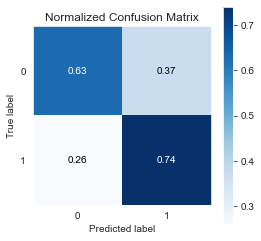

In [158]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(4,4), normalize='All')

**--> Nous avons 26% des 1 prédits en 0, mais aussi 37% des 0 prédits en 1. Il ne faut donc pas plus baisser le seuil.**

**Nous allons maintenant créer le fichier csv qui contiendra les données avec la prédiction de catégorie. Nous devons donc effectuer le prétraitement suivant sur des copies d'application_train et application_test :**  
**DATA - y - pos = NON - poly_deg = 0 - ln = NON -  std = OUI**

In [159]:
y_train = application_train['TARGET']
ID_client_test = application_test['SK_ID_CURR']

In [160]:
data_train = application_train[var_num_selec+var_cat_selec]
data_test = application_test[var_num_selec+var_cat_selec]

In [161]:
start_time = time.time()

data_train_num = data_train[var_num_selec]
data_test_num = data_test[var_num_selec]

# 1 - IMPUTATION MANQUANTS numériques
imputer = IterativeImputer(
    initial_strategy='median', random_state=0)
imputer.fit(data_train_num)

# train
data_temp_train = imputer.transform(data_train_num)
data_temp_train = pd.DataFrame(data_temp_train)
data_temp_train.columns = data_train_num.columns

# test
data_temp_test = imputer.transform(data_test_num)
data_temp_test = pd.DataFrame(data_temp_test)
data_temp_test.columns = data_test_num.columns

# imputation
for i in data_temp_train.columns:
    data_train.loc[:, i] = data_temp_train[i]
    data_test.loc[:, i] = data_temp_test[i]

exec_time = time.time() - start_time

print("Temps d'exécution : - %s seconds -" % "{:.2}".format(exec_time))
print('--------------------------------------------------------------')

Temps d'exécution : - 2.4e+02 seconds -
--------------------------------------------------------------


**On sauvegarde le dataset avant Standard Scaler, car nous aurons sans doute besoin de ses colonnes non standardisées pour le Dashboard :**

In [162]:
data_test_sauv = data_test.copy()

In [163]:
# 5 - STANDARD SCALER
std_train = data_train[var_num_selec]
std_test = data_test[var_num_selec]
std_scale = preprocessing.StandardScaler().fit(std_train)
std_train = std_scale.transform(std_train)
std_test = std_scale.transform(std_test)
# On créé 2 DF :
std_train = pd.DataFrame(
    std_train, columns=var_num_selec)
std_test = pd.DataFrame(
    std_test, columns=var_num_selec)

# On remplace dans data :
for i in var_num_selec:
    data_train.loc[:, i] = std_train[i]
    data_test.loc[:, i] = std_test[i]

In [164]:
# 6 - ENCODAGE ONE-HOT
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

print('----------------------')
print('TRAIN :')
print('------')
print('Shape :', data_train.shape)
print('Manquants (% total):',
      data_train.isna().sum().sum()/data_train.shape[0])
print('----------------------')
print('TEST :')
print('------')
print('Shape :', data_test.shape)
print('Manquants (% total):',
      data_test.isna().sum().sum()/data_test.shape[0])

----------------------
TRAIN :
------
Shape : (262325, 58)
Manquants (% total): 0.0
----------------------
TEST :
------
Shape : (42697, 58)
Manquants (% total): 0.0


**On re "fit" le classifieur :**

In [165]:
lgbm.fit(data_train, y_train)

LGBMClassifier(class_weight='balanced', learning_rate=0.05, objective='binary',
               random_state=0, reg_alpha=0.1, reg_lambda=0.01)

**On calcule y_proba et y_pred :**

In [166]:
y_proba = lgbm.predict_proba(data_test)[:,1]
y_pred = (lgbm.predict_proba(data_test)[:,1] >= 0.45).astype(int)

In [167]:
data_test['client'] = ID_client_test
data_test['proba'] = y_proba
data_test['prediction'] = y_pred

**Afin de selectionner les variables à afficher dans notre Dashboard, nous effetuons un "feature_importance :**

In [168]:
feature_imp = pd.DataFrame(zip(data_train.columns, lgbm.feature_importances_), columns=[
                           'variable', 'feature_importance']).sort_values('feature_importance', ascending=False).reset_index(drop=True)

In [169]:
feature_imp

,variable,feature_importance
0,EXT_SOURCE_1,362
1,EXT_SOURCE_2,336
2,AMT_CREDIT,239
3,EXT_SOURCE_3,229
4,DAYS_BIRTH,195
5,DAYS_EMPLOYED,154
6,bureau_DAYS_CREDIT_ENDDATE_max,113
7,bureau_DAYS_CREDIT_max,83
8,NAME_CONTRACT_TYPE_Cash loans,78
9,bureau_DAYS_ENDDATE_FACT_max,73


**Enfin, nous exportons data_test et feature_imp en csv :**

In [170]:
data_test.to_csv('data_test_final.csv', index=False)
feature_imp.to_csv('feature_imp_final.csv', index=False)

**Suite à l'étude de ces deux fichiers, nous décidons de constituer la base de données pour notre Dashboard comme ceci :**

In [171]:
data_dashboard = pd.read_csv('data_test_final.csv')

cols_data = ['client', 'proba', 'prediction']
data_dashboard = data_dashboard[cols_data]

In [172]:
application_test.shape

(42697, 333)

In [173]:
data_test.shape

(42697, 61)

In [174]:
data_test_sauv.shape

(42697, 54)

In [175]:
# on reprend application_test avant transformation
# application_test_gender = pd.read_csv('application_test.csv',usecols=['CODE_GENDER'])

data_dashboard['age'] = data_test_sauv['DAYS_BIRTH']/365
data_dashboard['duree_emploi'] = data_test_sauv['DAYS_EMPLOYED']/365
data_dashboard['genre'] = application_test['CODE_GENDER']
data_dashboard['proprietaire'] = application_test['FLAG_OWN_REALTY']
data_dashboard['enfants'] = application_test['CNT_CHILDREN']
data_dashboard['revenus'] = application_test['AMT_INCOME_TOTAL']
data_dashboard['montant_credit'] = application_test['AMT_CREDIT']

In [176]:
data_dashboard.isna().mean()

client            0.0
proba             0.0
prediction        0.0
age               0.0
duree_emploi      0.0
genre             0.0
proprietaire      0.0
enfants           0.0
revenus           0.0
montant_credit    0.0
dtype: float64

In [177]:
category, labels = pd.qcut(data_dashboard['age'], 4, retbins=True, precision = 0)

In [178]:
data_dashboard['categorie_age'] = category

**Enfin on exporte en csv :**

In [179]:
data_dashboard.to_csv('data_dashboard.csv', index=False)

In [180]:
raise SystemExit('STOP')

SystemExit: STOP

C:\Users\marti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
